# DonorsChoose

<p>
DonorsChoose.org receives hundreds of thousands of project proposals each year for classroom projects in need of funding. Right now, a large number of volunteers is needed to manually screen each submission before it's approved to be posted on the DonorsChoose.org website.
</p>
<p>
    Next year, DonorsChoose.org expects to receive close to 500,000 project proposals. As a result, there are three main problems they need to solve:
<ul>
<li>
    How to scale current manual processes and resources to screen 500,000 projects so that they can be posted as quickly and as efficiently as possible</li>
    <li>How to increase the consistency of project vetting across different volunteers to improve the experience for teachers</li>
    <li>How to focus volunteer time on the applications that need the most assistance</li>
    </ul>
</p>    
<p>
The goal of the competition is to predict whether or not a DonorsChoose.org project proposal submitted by a teacher will be approved, using the text of project descriptions as well as additional metadata about the project, teacher, and school. DonorsChoose.org can then use this information to identify projects most likely to need further review before approval.
</p>

## About the DonorsChoose Data Set

The `train.csv` data set provided by DonorsChoose contains the following features:

Feature | Description 
----------|---------------
**`project_id`** | A unique identifier for the proposed project. **Example:** `p036502`   
**`project_title`**    | Title of the project. **Examples:**<br><ul><li><code>Art Will Make You Happy!</code></li><li><code>First Grade Fun</code></li></ul> 
**`project_grade_category`** | Grade level of students for which the project is targeted. One of the following enumerated values: <br/><ul><li><code>Grades PreK-2</code></li><li><code>Grades 3-5</code></li><li><code>Grades 6-8</code></li><li><code>Grades 9-12</code></li></ul>  
 **`project_subject_categories`** | One or more (comma-separated) subject categories for the project from the following enumerated list of values:  <br/><ul><li><code>Applied Learning</code></li><li><code>Care &amp; Hunger</code></li><li><code>Health &amp; Sports</code></li><li><code>History &amp; Civics</code></li><li><code>Literacy &amp; Language</code></li><li><code>Math &amp; Science</code></li><li><code>Music &amp; The Arts</code></li><li><code>Special Needs</code></li><li><code>Warmth</code></li></ul><br/> **Examples:** <br/><ul><li><code>Music &amp; The Arts</code></li><li><code>Literacy &amp; Language, Math &amp; Science</code></li>  
  **`school_state`** | State where school is located ([Two-letter U.S. postal code](https://en.wikipedia.org/wiki/List_of_U.S._state_abbreviations#Postal_codes)). **Example:** `WY`
**`project_subject_subcategories`** | One or more (comma-separated) subject subcategories for the project. **Examples:** <br/><ul><li><code>Literacy</code></li><li><code>Literature &amp; Writing, Social Sciences</code></li></ul> 
**`project_resource_summary`** | An explanation of the resources needed for the project. **Example:** <br/><ul><li><code>My students need hands on literacy materials to manage sensory needs!</code</li></ul> 
**`project_essay_1`**    | First application essay<sup>*</sup>  
**`project_essay_2`**    | Second application essay<sup>*</sup> 
**`project_essay_3`**    | Third application essay<sup>*</sup> 
**`project_essay_4`**    | Fourth application essay<sup>*</sup> 
**`project_submitted_datetime`** | Datetime when project application was submitted. **Example:** `2016-04-28 12:43:56.245`   
**`teacher_id`** | A unique identifier for the teacher of the proposed project. **Example:** `bdf8baa8fedef6bfeec7ae4ff1c15c56`  
**`teacher_prefix`** | Teacher's title. One of the following enumerated values: <br/><ul><li><code>nan</code></li><li><code>Dr.</code></li><li><code>Mr.</code></li><li><code>Mrs.</code></li><li><code>Ms.</code></li><li><code>Teacher.</code></li></ul>  
**`teacher_number_of_previously_posted_projects`** | Number of project applications previously submitted by the same teacher. **Example:** `2` 

<sup>*</sup> See the section <b>Notes on the Essay Data</b> for more details about these features.

Additionally, the `resources.csv` data set provides more data about the resources required for each project. Each line in this file represents a resource required by a project:

Feature | Description 
----------|---------------
**`id`** | A `project_id` value from the `train.csv` file.  **Example:** `p036502`   
**`description`** | Desciption of the resource. **Example:** `Tenor Saxophone Reeds, Box of 25`   
**`quantity`** | Quantity of the resource required. **Example:** `3`   
**`price`** | Price of the resource required. **Example:** `9.95`   

**Note:** Many projects require multiple resources. The `id` value corresponds to a `project_id` in train.csv, so you use it as a key to retrieve all resources needed for a project:

The data set contains the following label (the value you will attempt to predict):

Label | Description
----------|---------------
`project_is_approved` | A binary flag indicating whether DonorsChoose approved the project. A value of `0` indicates the project was not approved, and a value of `1` indicates the project was approved.

### Notes on the Essay Data

<ul>
Prior to May 17, 2016, the prompts for the essays were as follows:
<li>__project_essay_1:__ "Introduce us to your classroom"</li>
<li>__project_essay_2:__ "Tell us more about your students"</li>
<li>__project_essay_3:__ "Describe how your students will use the materials you're requesting"</li>
<li>__project_essay_3:__ "Close by sharing why your project will make a difference"</li>
</ul>


<ul>
Starting on May 17, 2016, the number of essays was reduced from 4 to 2, and the prompts for the first 2 essays were changed to the following:<br>
<li>__project_essay_1:__ "Describe your students: What makes your students special? Specific details about their background, your neighborhood, and your school are all helpful."</li>
<li>__project_essay_2:__ "About your project: How will these materials make a difference in your students' learning and improve their school lives?"</li>
<br>For all projects with project_submitted_datetime of 2016-05-17 and later, the values of project_essay_3 and project_essay_4 will be NaN.
</ul>


In [33]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

import sqlite3
import pandas as pd
import numpy as np
import nltk
import string
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from nltk.stem.porter import PorterStemmer

import re
# Tutorial about Python regular expressions: https://pymotw.com/2/re/
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer

from gensim.models import Word2Vec
from gensim.models import KeyedVectors
import pickle

from tqdm import tqdm
import os

from chart_studio import plotly
import plotly.offline as offline
import plotly.graph_objs as go
offline.init_notebook_mode()
from collections import Counter

# Assignment 10: Clustering

- <font color='red'>step 1</font>: Choose any vectorizer (data matrix) that you have worked in any of the assignments, and got the best AUC value.
- <font color='red'>step 2</font>: Choose any of the <a href='https://scikit-learn.org/stable/modules/feature_selection.html'>feature selection</a>/<a href='https://scikit-learn.org/stable/modules/decomposition.html'>reduction algorithms</a> ex: selectkbest features, pretrained word vectors, model based feature selection etc and reduce the number of features to 5k features
- <font color='red'>step 3</font>: Apply all three kmeans, Agglomerative clustering, DBSCAN
    - <strong>K-Means Clustering:</strong> <br>
        ● Find the best ‘k’ using the elbow-knee method (plot k vs inertia_)<br>
    - <strong>Agglomerative Clustering: </strong><br>
        ● Apply <a href='https://stackabuse.com/hierarchical-clustering-with-python-and-scikit-learn/'>agglomerative algorithm</a> and try a different number of clusters like 2,5 etc. <br>
        ● You can take less data points (as this is very computationally expensive one) to perform hierarchical clustering because they do take a considerable amount of time to run. <br>
    - <strong>DBSCAN Clustering: </strong><br>
        ● Find the best ‘eps’ using the <a href='https://stackoverflow.com/a/48558030/4084039'>elbow-knee method</a>.<br>
        ● You can take a smaller sample size for this as well.
- <font color='red'>step 4</font>: Summarize each cluster by manually observing few points from each cluster.
- <font color='red'>step 5</font>: You need to plot the word cloud with essay text for each cluster for each of algorithms mentioned in <font color='red'>step 3</font>.

<h1>2. Clustering </h1>

<h2>2.1 Splitting data into Train and cross validation(or test): Stratified Sampling</h2>

In [34]:
# please write all the code with proper documentation, and proper titles for each subsection
# go through documentations and blogs before you start coding
# first figure out what to do, and then think about how to do.
# reading and understanding error messages will be very much helpfull in debugging your code
# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split # replace the cross_validation by model_selection
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score # replace the cross_validation by model_selection
from collections import Counter
from sklearn.metrics import accuracy_score
from sklearn import model_selection # replace the cross_validation by model_selection

In [35]:
project_data = pd.read_csv('train_data.csv')
resource_data = pd.read_csv('resources.csv')
price_data = resource_data.groupby('id').agg({'price':'sum', 'quantity':'sum'}).reset_index()
project_data = pd.merge(project_data, price_data, on='id', how='left')

In [57]:
y_train=project_data['project_is_approved']

<h2>2.2 Make Data Model Ready: encoding numerical, categorical features</h2>

<h3> 2.2.1 Encoding for feature 'project_subject_categories' on dataset </h3>

In [36]:
# Encoding the project_subject_categories
catogories = list(project_data['project_subject_categories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python
cat_list = []
for i in catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp+=j.strip()+" " #" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_') # we are replacing the & value into 
    cat_list.append(temp.strip())
    
project_data['clean_categories'] = cat_list
project_data.drop(['project_subject_categories'], axis=1, inplace=True)

from collections import Counter
my_counter = Counter()
for word in project_data['clean_categories'].values:
    my_counter.update(word.split())

cat_dict = dict(my_counter)
sorted_cat_dict = dict(sorted(cat_dict.items(), key=lambda kv: kv[1]))

from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(vocabulary=list(sorted_cat_dict.keys()), lowercase=False, binary=True)
categories_one_hot_train = vectorizer.fit_transform(project_data['clean_categories'].values)
print(vectorizer.get_feature_names())
print("Shape of matrix after one hot encodig ",categories_one_hot_train.shape)



['Warmth', 'Care_Hunger', 'History_Civics', 'Music_Arts', 'AppliedLearning', 'SpecialNeeds', 'Health_Sports', 'Math_Science', 'Literacy_Language']
Shape of matrix after one hot encodig  (109248, 9)


<h3> 2.2.2 Encoding for feature 'project_subject_subcategories' on dataset </h3>

In [37]:
# Encoding the project_subject_subcategories
sub_catogories = list(project_data['project_subject_subcategories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python

sub_cat_list = []
for i in sub_catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp +=j.strip()+" "#" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_')
    sub_cat_list.append(temp.strip())

project_data['clean_subcategories'] = sub_cat_list
project_data.drop(['project_subject_subcategories'], axis=1, inplace=True)

# count of all the words in corpus python: https://stackoverflow.com/a/22898595/4084039
my_counter = Counter()
for word in project_data['clean_subcategories'].values:
    my_counter.update(word.split())
    
sub_cat_dict = dict(my_counter)
sorted_sub_cat_dict = dict(sorted(sub_cat_dict.items(), key=lambda kv: kv[1]))

vectorizer = CountVectorizer(vocabulary=list(sorted_sub_cat_dict.keys()), lowercase=False, binary=True)
sub_categories_one_hot_train = vectorizer.fit_transform(project_data['clean_subcategories'].values)
print(vectorizer.get_feature_names())
print("Shape of matrix after one hot encodig ",sub_categories_one_hot_train.shape)

['Economics', 'CommunityService', 'FinancialLiteracy', 'ParentInvolvement', 'Extracurricular', 'Civics_Government', 'ForeignLanguages', 'NutritionEducation', 'Warmth', 'Care_Hunger', 'SocialSciences', 'PerformingArts', 'CharacterEducation', 'TeamSports', 'Other', 'College_CareerPrep', 'Music', 'History_Geography', 'Health_LifeScience', 'EarlyDevelopment', 'ESL', 'Gym_Fitness', 'EnvironmentalScience', 'VisualArts', 'Health_Wellness', 'AppliedSciences', 'SpecialNeeds', 'Literature_Writing', 'Mathematics', 'Literacy']
Shape of matrix after one hot encodig  (109248, 30)


<h3>  2.2.3 Encoding for feature 'school_state'  </h3>

In [38]:
vectorizer = CountVectorizer()
#Encoding for Train data using fit_transform()
school_state_one_hot_train = vectorizer.fit_transform(project_data['school_state'].values)
print("Shape of matrix after one hot encodig ",school_state_one_hot_train.shape)


Shape of matrix after one hot encodig  (109248, 51)


<h3>  2.2.4 Encoding for feature 'teacher_prefix'  </h3>

In [51]:
#filling empty values
project_data = project_data.fillna(project_data['teacher_prefix'].value_counts().index[0])

In [52]:
vectorizer = CountVectorizer()
#Encoding for Train data using fit_transform()
teacher_prefix_one_hot_train = vectorizer.fit_transform(project_data['teacher_prefix'].values)
print("Shape of matrix after one hot encodig ",teacher_prefix_one_hot_train.shape)


Shape of matrix after one hot encodig  (109248, 5)


<h3>  2.2.5 Encoding for feature 'project_grade_category'  </h3>

In [40]:
project_data.project_grade_category = project_data.project_grade_category.str.replace('\s+', '_')
project_data.project_grade_category = project_data.project_grade_category.str.replace('-', '_')
vectorizer = CountVectorizer()
#Encoding for Train data using fit_transform()
project_grade_category_one_hot_train = vectorizer.fit_transform(project_data['project_grade_category'])
print("Shape of matrix after one hot encodig ",project_grade_category_one_hot_train.shape)


Shape of matrix after one hot encodig  (109248, 4)


<h3>  2.2.6 Encoding for feature 'price'  </h3>

In [41]:

from sklearn.preprocessing import StandardScaler

# price_standardized = standardScalar.fit(X_tr['price'].values)
# this will rise the error
# ValueError: Expected 2D array, got 1D array instead: array=[725.05 213.03 329.   ... 399.   287.73   5.5 ].
# Reshape your data either using array.reshape(-1, 1)

price_scalar = StandardScaler()
price_scalar.fit(project_data['price'].values.reshape(-1,1)) # finding the mean and standard deviation of this data

#For Training Data 
price_standardized_train = price_scalar.fit_transform(project_data['price'].values.reshape(-1, 1))



<h3>  2.2.6 Encoding for feature 'teacher_number_of_previously_posted_projects '  </h3>

In [42]:
from sklearn.preprocessing import StandardScaler

# price_standardized = standardScalar.fit(X_tr['price'].values)
# this will rise the error
# ValueError: Expected 2D array, got 1D array instead: array=[725.05 213.03 329.   ... 399.   287.73   5.5 ].
# Reshape your data either using array.reshape(-1, 1)

price_scalar = StandardScaler()
price_scalar.fit(project_data['teacher_number_of_previously_posted_projects'].values.reshape(-1,1)) # finding the mean and standard deviation of this data


#For Train Data 
tnoppp_standardized_train = price_scalar.transform(project_data['teacher_number_of_previously_posted_projects'].values.reshape(-1, 1))


<h2>2.3 Make Data Model Ready: encoding eassay, and project_title</h2>

<h3> 2.3.1 Encoding essays for training data </h3>

In [43]:
# merge two column text dataframe for training data: 
project_data["essay"] = project_data["project_essay_1"].map(str) +\
                        project_data["project_essay_2"].map(str) + \
                        project_data["project_essay_3"].map(str) + \
                        project_data["project_essay_4"].map(str)

In [44]:
import re

def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase


In [45]:
# https://gist.github.com/sebleier/554280
# we are removing the words from the stop words list: 'no', 'nor', 'not'
stopwords= ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
            'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
            's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
            've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',\
            "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',\
            "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", \
            'won', "won't", 'wouldn', "wouldn't"]

In [46]:
# Encoding essays for training data
from tqdm import tqdm
preprocessed_essays_train = []
# tqdm is for printing the status bar
for sentance in tqdm(project_data['essay'].values):
    sent = decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e not in stopwords)
    preprocessed_essays_train.append(sent.lower().strip()) 


 10%|███████▌                                                                  | 11224/109248 [00:14<02:04, 786.54it/s]


 20%|███████████████▏                                                          | 22375/109248 [00:28<02:02, 712.04it/s]


 31%|██████████████████████▋                                                   | 33507/109248 [00:43<01:42, 740.88it/s]


 41%|██████████████████████████████▏                                           | 44658/109248 [00:57<01:25, 758.07it/s]


 52%|█████████████████████████████████████▋                                   | 56322/109248 [01:11<00:44, 1201.09it/s]


 66%|████████████████████████████████████████████████▌                         | 71682/109248 [01:26<00:49, 762.34it/s]


 76%|███████████████████████████████████████████████████████▉                  | 82599/109248 [01:41<00:34, 766.21it/s]


 86%|███████████████████████████████████████████████████████████████▌          | 93865/109248 [01:55<00:20, 747.67it/s]


 96%|██████████████████████████████████████████████████████████████████████   | 104867/109248 [02:10<00:05, 775.80it/s]


100%|█████████████████████████████████████████████████████████████████████████| 109248/109248 [02:15<00:00, 803.80it/s]


<h3> 2.3.1 Encoding for 'project_title' for training data </h3>

In [47]:
from tqdm import tqdm
preprocessed_project_title_train = []
# tqdm is for printing the status bar
for sentance in tqdm(project_data['project_title'].values):
    sent = decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e not in stopwords)
    preprocessed_project_title_train.append(sent.lower().strip())


100%|███████████████████████████████████████████████████████████████████████| 109248/109248 [00:07<00:00, 15224.02it/s]


<h4> TFIDF of feature essays  </h4>

In [48]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(min_df=10)
text_tfidf_train = vectorizer.fit_transform(preprocessed_essays_train)
print("Shape of matrix after one hot encodig for Train data",text_tfidf_train.shape)

Shape of matrix after one hot encodig for Train data (109248, 16623)


<h4> TFIDF of feature project_title </h4>

In [49]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(min_df=10)
title_tfidf_train = vectorizer.fit_transform(preprocessed_project_title_train)
print("Shape of matrix after one hot encodig ",title_tfidf_train.shape)

Shape of matrix after one hot encodig  (109248, 3329)


In [53]:
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
from scipy.sparse import hstack
T_TFIDF_train = hstack((categories_one_hot_train, sub_categories_one_hot_train, school_state_one_hot_train, teacher_prefix_one_hot_train, project_grade_category_one_hot_train,text_tfidf_train, title_tfidf_train, price_standardized_train, tnoppp_standardized_train))


In [54]:
T_TFIDF_train.shape  

(109248, 20053)

In [55]:
T_TFIDF_train.data = np.nan_to_num(T_TFIDF_train.data)

In [56]:
T_TFIDF_train.data= (T_TFIDF_train.data - T_TFIDF_train.data.min(0)) / T_TFIDF_train.data.ptp(0)

<h2>Select 5000 best features</h2>

In [58]:
from sklearn.feature_selection import SelectKBest, chi2
T_TFIDF_train_tr_new = SelectKBest(chi2, k=5000).fit_transform(T_TFIDF_train,y_train)

<h2>Apply KMeans</h2>

In [60]:
from sklearn.cluster import KMeans

k_values = [2,3,4,5,6,7,8]
loss = []
for i in k_values:
    kmeans = KMeans(n_clusters=i, n_jobs=-1).fit(T_TFIDF_train_tr_new)
    loss.append(kmeans.inertia_)

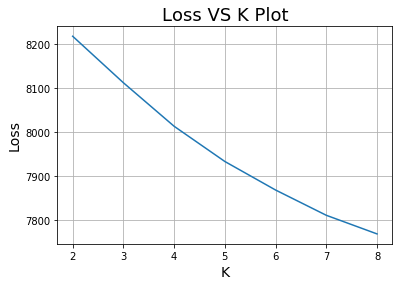

In [61]:
plt.plot(k_values, loss)
plt.xlabel('K',size=16)
plt.ylabel('Loss',size=16)
plt.title('Loss VS K Plot',size=18)
plt.grid()
plt.show()

In [63]:
optimal_k = 6#come from plot

kmeans = KMeans(n_clusters=optimal_k, n_jobs=-1).fit(T_TFIDF_train_tr_new)

In [66]:
project_data.columns

Index(['Unnamed: 0', 'id', 'teacher_id', 'teacher_prefix', 'school_state',
       'project_submitted_datetime', 'project_grade_category', 'project_title',
       'project_essay_1', 'project_essay_2', 'project_essay_3',
       'project_essay_4', 'project_resource_summary',
       'teacher_number_of_previously_posted_projects', 'project_is_approved',
       'price', 'quantity', 'clean_categories', 'clean_subcategories',
       'essay'],
      dtype='object')

In [67]:
essays = project_data['essay'].values

cluster1 = []
cluster2 = []
cluster3 = []
cluster4 = []
cluster5 = []
cluster6 = []
for i in range(kmeans.labels_.shape[0]):
    if kmeans.labels_[i] == 0:
        cluster1.append(essays[i])
    elif kmeans.labels_[i] == 1:
        cluster2.append(essays[i])
    elif kmeans.labels_[i] == 2:
        cluster3.append(essays[i])
    elif  kmeans.labels_[i] == 3:
        cluster4.append(essays[i])
    elif  kmeans.labels_[i] == 4:
        cluster5.append(essays[i])
    elif  kmeans.labels_[i] == 5:
        cluster6.append(essays[i])

<h3>Summarizing each cluster by manually observing few points from each cluster.</h3>

In [68]:
for i in range(3):
    print('%s\n'%(cluster1[i]))

Our students arrive to our school eager to learn. They are polite, generous, and strive to be the best they can be. They know that with an education, they can succeed in life and help improve on the lives that they have now.\r\n\r\nOur school focuses on families with low incomes and tries to give each student the education they deserve. While we do not have much, the students use the materials they are given and do the very best they can with them.The projector we need for our school is very crucial for the academic improvement of our students. As technology continues to grow, there are so many resources in the internet that we as teachers use to further the growth of our students. However, our school is very limited with resources - particularly, technology - and without it, we are at a disadvantage. One of the things that could really help our classrooms is a projector.\r\n\r\n\r\nWith a projector, not only is it crucial with instruction, but also for the growth of our students. With

In [69]:
for i in range(3):
    print('%s\n'%(cluster2[i]))

\r\n\"True champions aren't always the ones that win, but those with the most guts.\" By Mia Hamm This quote best describes how the students at Cholla Middle School approach playing sports, especially for the girls and boys soccer teams. The teams are made up of 7th and 8th grade students, and most of them have not had the opportunity to play in an organized sport due to family financial difficulties. \r\nI teach at a Title One middle school in an urban neighborhood. 74% of our students qualify for free and reduced lunch and many come from very activity/ sport opportunity-poor homes. My students love to participate in sports to learn new skills and be apart of team atmosphere. My school lacks the funding to meet my students’ needs and I am concerned that their lack of exposure will not prepare them for the participating in sports and teams in high school. By the end of the school year, the goal is to provide our students with an opportunity to learn a variety of soccer skills, and posi

In [70]:
for i in range(3):
    print('%s\n'%(cluster3[i]))

Over 95% of my students are on free or reduced lunch.  I have a few who are homeless, but despite that, they come to school with an eagerness to learn.  My students are inquisitive eager learners who  embrace the challenge of not having great books and other resources  every day.  Many of them are not afforded the opportunity to engage with these big colorful pages of a book on a regular basis at home and they don't travel to the public library.  \r\nIt is my duty as a teacher to do all I can to provide each student an opportunity to succeed in every aspect of life. \r\nReading is Fundamental! My students will read these books over and over again while boosting their comprehension skills. These books will be used for read alouds, partner reading and for Independent reading. \r\nThey will engage in reading to build their \"Love for Reading\" by reading for pure enjoyment. They will be introduced to some new authors as well as some old favorites. I want my students to be ready for the 21

In [72]:
for i in range(3):
    print('%s\n'%(cluster4[i]))

My students are the most talented, interesting, and motivated group of first graders that I've ever met. However, they are faced with many barriers that prevent them from working to their full potential. Those barriers include low income, single parent homes, military families, and a lack of technology. Although my students are very diverse, they each share a strong desire to learn to read, write, and solve problems. That's why having the latest technology gadgets and using the best practices is so important to me.I am requesting one Dell Touch-screen  computer for our classroom computer lab. This desktop computer will be a welcome addition to our classroom because we only have a few student computers. The students will appreciate having more computer learning times. I am teaching my students, at an early age, how to research things before purchasing them or asking their parents for them. We previously learned about wants and needs in our reading unit. This computer will help me teach 

In [73]:
for i in range(3):
    print('%s\n'%(cluster5[i]))

I will be moving from 2nd grade to 3rd grade at the beginning of the next school year. I will be takings some of my current students with me in the move. I teach an inclusion classroom, which includes students with ADHD, SLD, as well as autistic students. My students work very hard on achieving their goals, no matter what struggles they may have. The school where I teach houses a great deal of autistic students, as well as ELL students.  My student love to read, work, and challenge themselves. They also LOVE to move around. They work better when able to move about the room to different areas, rather then their usual set.These flexible seating options will allow my students to have different seating options. Instead of sitting at the traditional desk and chair, they will be able to use these flexible seating tools to reduce stress and anxiety. These tools are beneficial to students with special needs, but also all students. It is a proven fact that when students are up and moving, more 

In [74]:
for i in range(3):
    print('%s\n'%(cluster6[i]))

My students are English learners that are working on English as their second or third languages. We are a melting pot of refugees, immigrants, and native-born Americans bringing the gift of language to our school. \r\n\r\n We have over 24 languages represented in our English Learner program with students at every level of mastery.  We also have over 40 countries represented with the families within our school.  Each student brings a wealth of knowledge and experiences to us that open our eyes to new cultures, beliefs, and respect.\"The limits of your language are the limits of your world.\"-Ludwig Wittgenstein  Our English learner's have a strong support system at home that begs for more resources.  Many times our parents are learning to read and speak English along side of their children.  Sometimes this creates barriers for parents to be able to help their child learn phonetics, letter recognition, and other reading skills.\r\n\r\nBy providing these dvd's and players, students are ab

<h3>Wordcloud for clusters</h3>

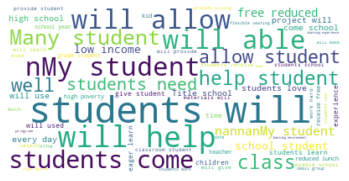

In [75]:
#Clster 1st
words=''
for i in cluster1:
    words+=str(i)
from wordcloud import WordCloud
wordcloud = WordCloud(background_color="white").generate(words)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


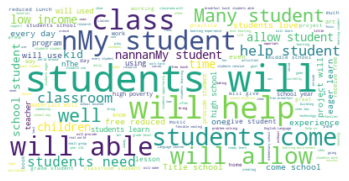

In [76]:
#Cluster 2nd
words=''
for i in cluster2:
    words+=str(i)
from wordcloud import WordCloud
wordcloud = WordCloud(background_color="white").generate(words)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


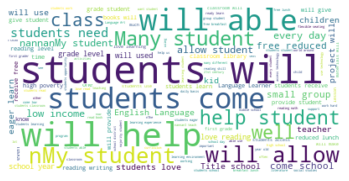

In [77]:
#cluster 3rd
words=''
for i in cluster3:
    words+=str(i)
from wordcloud import WordCloud
wordcloud = WordCloud(background_color="white").generate(words)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


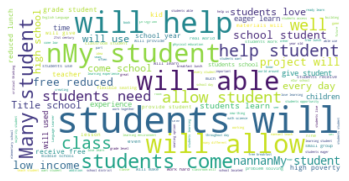

In [78]:
#Cluster 4th
words=''
for i in cluster1:
    words+=str(i)
from wordcloud import WordCloud
wordcloud = WordCloud(background_color="white").generate(words)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


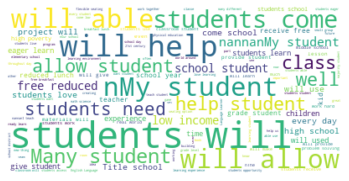

In [79]:
#cluster 5th
words=''
for i in cluster1:
    words+=str(i)
from wordcloud import WordCloud
wordcloud = WordCloud(background_color="white").generate(words)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


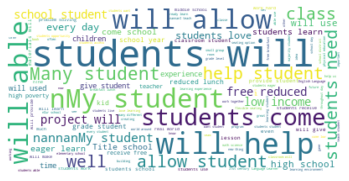

In [80]:
#Cluster 6th
words=''
for i in cluster1:
    words+=str(i)
from wordcloud import WordCloud
wordcloud = WordCloud(background_color="white").generate(words)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


<h2>Apply Agglomerative Clustering</h2>

<h3>For k=2</h3>

<h3>Converting the whole dataset to 2500 datapoints</h3>

In [89]:
T_TFIDF_train_tr_new = T_TFIDF_train_tr_new[:2500]

In [90]:
T_TFIDF_train_tr_new.shape

(2500, 5000)

In [91]:
from sklearn.cluster import AgglomerativeClustering

aggcl=AgglomerativeClustering(n_clusters=2).fit(T_TFIDF_train_tr_new.toarray())

In [93]:
cluster1=[]
cluster2=[]
essays = project_data['essay'].values
for i in range(aggcl.labels_.shape[0]):
    if aggcl.labels_[i] == 0:
        cluster1.append(essays[i])
    elif aggcl.labels_[i] == 1:
        cluster2.append(essays[i])

<h3>Summarizing each cluster by manually observing few points from each cluster.</h3>

In [94]:
for i in range(3):
    print('%s\n'%(cluster1[i]))

Our students arrive to our school eager to learn. They are polite, generous, and strive to be the best they can be. They know that with an education, they can succeed in life and help improve on the lives that they have now.\r\n\r\nOur school focuses on families with low incomes and tries to give each student the education they deserve. While we do not have much, the students use the materials they are given and do the very best they can with them.The projector we need for our school is very crucial for the academic improvement of our students. As technology continues to grow, there are so many resources in the internet that we as teachers use to further the growth of our students. However, our school is very limited with resources - particularly, technology - and without it, we are at a disadvantage. One of the things that could really help our classrooms is a projector.\r\n\r\n\r\nWith a projector, not only is it crucial with instruction, but also for the growth of our students. With

In [95]:
for i in range(3):
    print('%s\n'%(cluster2[i]))

My students are English learners that are working on English as their second or third languages. We are a melting pot of refugees, immigrants, and native-born Americans bringing the gift of language to our school. \r\n\r\n We have over 24 languages represented in our English Learner program with students at every level of mastery.  We also have over 40 countries represented with the families within our school.  Each student brings a wealth of knowledge and experiences to us that open our eyes to new cultures, beliefs, and respect.\"The limits of your language are the limits of your world.\"-Ludwig Wittgenstein  Our English learner's have a strong support system at home that begs for more resources.  Many times our parents are learning to read and speak English along side of their children.  Sometimes this creates barriers for parents to be able to help their child learn phonetics, letter recognition, and other reading skills.\r\n\r\nBy providing these dvd's and players, students are ab

<h3>Wordcloud for clusters</h3>

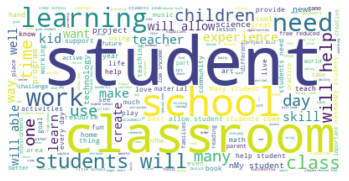

In [96]:
#cluster 1
words=''
for i in cluster1:
    words+=str(i)
from wordcloud import WordCloud
wordcloud = WordCloud(background_color="white").generate(words)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

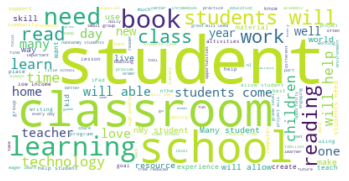

In [97]:
#cluster 2
words=''
for i in cluster2:
    words+=str(i)
from wordcloud import WordCloud
wordcloud = WordCloud(background_color="white").generate(words)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

<h3>For k=5</h3>

In [98]:
from sklearn.cluster import AgglomerativeClustering

aggcl=AgglomerativeClustering(n_clusters=5).fit(T_TFIDF_train_tr_new.toarray())

In [99]:
cluster1=[]
cluster2=[]
cluster3=[]
cluster4=[]
cluster5=[]
essays = project_data['essay'].values#
for i in range(aggcl.labels_.shape[0]):
    if aggcl.labels_[i] == 0:
        cluster1.append(essays[i])
    elif aggcl.labels_[i] == 1:
        cluster2.append(essays[i])
    elif aggcl.labels_[i] == 2:
        cluster3.append(essays[i])
    elif  aggcl.labels_[i] == 3:
        cluster4.append(essays[i])
    elif  aggcl.labels_[i] == 4:
        cluster5.append(essays[i])

<h3>Summarizing each cluster by manually observing few points from each cluster.</h3>

In [100]:
for i in range(3):
    print('%s\n'%(cluster1[i]))

\r\n\"True champions aren't always the ones that win, but those with the most guts.\" By Mia Hamm This quote best describes how the students at Cholla Middle School approach playing sports, especially for the girls and boys soccer teams. The teams are made up of 7th and 8th grade students, and most of them have not had the opportunity to play in an organized sport due to family financial difficulties. \r\nI teach at a Title One middle school in an urban neighborhood. 74% of our students qualify for free and reduced lunch and many come from very activity/ sport opportunity-poor homes. My students love to participate in sports to learn new skills and be apart of team atmosphere. My school lacks the funding to meet my students’ needs and I am concerned that their lack of exposure will not prepare them for the participating in sports and teams in high school. By the end of the school year, the goal is to provide our students with an opportunity to learn a variety of soccer skills, and posi

In [101]:
for i in range(3):
    print('%s\n'%(cluster2[i]))

My students are English learners that are working on English as their second or third languages. We are a melting pot of refugees, immigrants, and native-born Americans bringing the gift of language to our school. \r\n\r\n We have over 24 languages represented in our English Learner program with students at every level of mastery.  We also have over 40 countries represented with the families within our school.  Each student brings a wealth of knowledge and experiences to us that open our eyes to new cultures, beliefs, and respect.\"The limits of your language are the limits of your world.\"-Ludwig Wittgenstein  Our English learner's have a strong support system at home that begs for more resources.  Many times our parents are learning to read and speak English along side of their children.  Sometimes this creates barriers for parents to be able to help their child learn phonetics, letter recognition, and other reading skills.\r\n\r\nBy providing these dvd's and players, students are ab

In [102]:
for i in range(3):
    print('%s\n'%(cluster3[i]))

I will be moving from 2nd grade to 3rd grade at the beginning of the next school year. I will be takings some of my current students with me in the move. I teach an inclusion classroom, which includes students with ADHD, SLD, as well as autistic students. My students work very hard on achieving their goals, no matter what struggles they may have. The school where I teach houses a great deal of autistic students, as well as ELL students.  My student love to read, work, and challenge themselves. They also LOVE to move around. They work better when able to move about the room to different areas, rather then their usual set.These flexible seating options will allow my students to have different seating options. Instead of sitting at the traditional desk and chair, they will be able to use these flexible seating tools to reduce stress and anxiety. These tools are beneficial to students with special needs, but also all students. It is a proven fact that when students are up and moving, more 

In [103]:
for i in range(3):
    print('%s\n'%(cluster4[i]))

Our students arrive to our school eager to learn. They are polite, generous, and strive to be the best they can be. They know that with an education, they can succeed in life and help improve on the lives that they have now.\r\n\r\nOur school focuses on families with low incomes and tries to give each student the education they deserve. While we do not have much, the students use the materials they are given and do the very best they can with them.The projector we need for our school is very crucial for the academic improvement of our students. As technology continues to grow, there are so many resources in the internet that we as teachers use to further the growth of our students. However, our school is very limited with resources - particularly, technology - and without it, we are at a disadvantage. One of the things that could really help our classrooms is a projector.\r\n\r\n\r\nWith a projector, not only is it crucial with instruction, but also for the growth of our students. With

In [104]:
for i in range(3):
    print('%s\n'%(cluster5[i]))

Over 95% of my students are on free or reduced lunch.  I have a few who are homeless, but despite that, they come to school with an eagerness to learn.  My students are inquisitive eager learners who  embrace the challenge of not having great books and other resources  every day.  Many of them are not afforded the opportunity to engage with these big colorful pages of a book on a regular basis at home and they don't travel to the public library.  \r\nIt is my duty as a teacher to do all I can to provide each student an opportunity to succeed in every aspect of life. \r\nReading is Fundamental! My students will read these books over and over again while boosting their comprehension skills. These books will be used for read alouds, partner reading and for Independent reading. \r\nThey will engage in reading to build their \"Love for Reading\" by reading for pure enjoyment. They will be introduced to some new authors as well as some old favorites. I want my students to be ready for the 21

<h3>Wordcloud for clusters</h3>

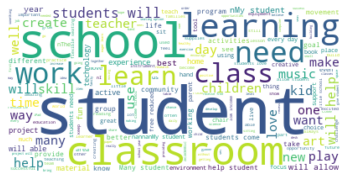

In [105]:
#cluster 1
words=''
for i in cluster1:
    words+=str(i)
from wordcloud import WordCloud
wordcloud = WordCloud(background_color="white").generate(words)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

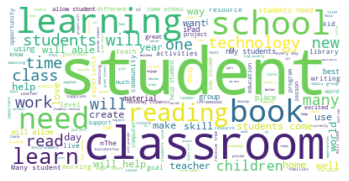

In [106]:
#cluster 2
words=''
for i in cluster2:
    words+=str(i)
from wordcloud import WordCloud
wordcloud = WordCloud(background_color="white").generate(words)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

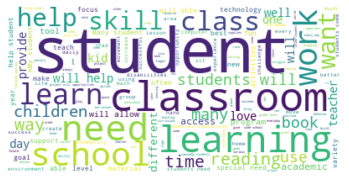

In [107]:
#cluster 3
words=''
for i in cluster3:
    words+=str(i)
from wordcloud import WordCloud
wordcloud = WordCloud(background_color="white").generate(words)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

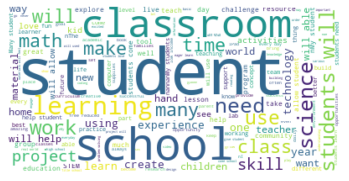

In [108]:
#cluster 4
words=''
for i in cluster4:
    words+=str(i)
from wordcloud import WordCloud
wordcloud = WordCloud(background_color="white").generate(words)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

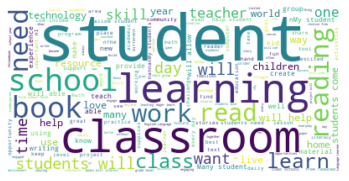

In [109]:
#cluster 5
words=''
for i in cluster5:
    words+=str(i)
from wordcloud import WordCloud
wordcloud = WordCloud(background_color="white").generate(words)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

<h2>Apply DBSCAN</h2>



  0%|                                                                                         | 0/2500 [00:00<?, ?it/s]

  0%|▏                                                                                | 4/2500 [00:00<01:19, 31.33it/s]

  0%|▏                                                                                | 7/2500 [00:00<01:22, 30.20it/s]

  0%|▎                                                                               | 11/2500 [00:00<01:21, 30.39it/s]

  1%|▍                                                                               | 14/2500 [00:00<01:22, 30.19it/s]

  1%|▌                                                                               | 17/2500 [00:00<01:23, 29.71it/s]

  1%|▋                                                                               | 21/2500 [00:00<01:22, 30.18it/s]

  1%|▊                                                                               | 24/2500 [00:00<01:22, 29.88it/s]

  1%|▊                        

 17%|█████████████▌                                                                 | 430/2500 [00:15<01:14, 27.95it/s]

 17%|█████████████▋                                                                 | 433/2500 [00:15<01:15, 27.53it/s]

 17%|█████████████▊                                                                 | 436/2500 [00:15<01:14, 27.71it/s]

 18%|█████████████▊                                                                 | 439/2500 [00:15<01:14, 27.83it/s]

 18%|█████████████▉                                                                 | 442/2500 [00:15<01:14, 27.60it/s]

 18%|██████████████                                                                 | 445/2500 [00:15<01:13, 27.91it/s]

 18%|██████████████▏                                                                | 448/2500 [00:15<01:13, 27.74it/s]

 18%|██████████████▎                                                                | 451/2500 [00:16<01:13, 27.77it/s]

 18%|██████████████▎            

 36%|████████████████████████████▍                                                  | 898/2500 [00:31<00:52, 30.46it/s]

 36%|████████████████████████████▌                                                  | 902/2500 [00:31<00:52, 30.23it/s]

 36%|████████████████████████████▋                                                  | 906/2500 [00:31<00:53, 30.07it/s]

 36%|████████████████████████████▊                                                  | 910/2500 [00:31<00:52, 30.37it/s]

 37%|████████████████████████████▉                                                  | 914/2500 [00:31<00:51, 30.72it/s]

 37%|█████████████████████████████                                                  | 918/2500 [00:31<00:51, 30.98it/s]

 37%|█████████████████████████████▏                                                 | 922/2500 [00:32<00:51, 30.52it/s]

 37%|█████████████████████████████▎                                                 | 926/2500 [00:32<00:51, 30.41it/s]

 37%|███████████████████████████

 53%|█████████████████████████████████████████▎                                    | 1325/2500 [00:46<00:42, 27.55it/s]

 53%|█████████████████████████████████████████▍                                    | 1328/2500 [00:46<00:42, 27.34it/s]

 53%|█████████████████████████████████████████▌                                    | 1331/2500 [00:46<00:42, 27.57it/s]

 53%|█████████████████████████████████████████▋                                    | 1335/2500 [00:46<00:40, 28.72it/s]

 54%|█████████████████████████████████████████▊                                    | 1339/2500 [00:47<00:39, 29.26it/s]

 54%|█████████████████████████████████████████▊                                    | 1342/2500 [00:47<00:39, 29.42it/s]

 54%|█████████████████████████████████████████▉                                    | 1345/2500 [00:47<00:39, 29.35it/s]

 54%|██████████████████████████████████████████                                    | 1348/2500 [00:47<00:39, 29.31it/s]

 54%|███████████████████████████

 73%|████████████████████████████████████████████████████████▉                     | 1825/2500 [01:03<00:21, 31.07it/s]

 73%|█████████████████████████████████████████████████████████                     | 1829/2500 [01:03<00:21, 31.08it/s]

 73%|█████████████████████████████████████████████████████████▏                    | 1833/2500 [01:03<00:22, 30.24it/s]

 73%|█████████████████████████████████████████████████████████▎                    | 1837/2500 [01:03<00:21, 30.98it/s]

 74%|█████████████████████████████████████████████████████████▍                    | 1841/2500 [01:03<00:21, 30.59it/s]

 74%|█████████████████████████████████████████████████████████▌                    | 1845/2500 [01:03<00:21, 30.32it/s]

 74%|█████████████████████████████████████████████████████████▋                    | 1849/2500 [01:03<00:21, 30.27it/s]

 74%|█████████████████████████████████████████████████████████▊                    | 1853/2500 [01:04<00:21, 30.65it/s]

 74%|███████████████████████████

 94%|█████████████████████████████████████████████████████████████████████████▌    | 2356/2500 [01:20<00:05, 28.50it/s]

 94%|█████████████████████████████████████████████████████████████████████████▋    | 2360/2500 [01:20<00:04, 29.23it/s]

 95%|█████████████████████████████████████████████████████████████████████████▊    | 2364/2500 [01:20<00:04, 29.43it/s]

 95%|█████████████████████████████████████████████████████████████████████████▊    | 2367/2500 [01:20<00:04, 29.02it/s]

 95%|█████████████████████████████████████████████████████████████████████████▉    | 2371/2500 [01:21<00:04, 29.81it/s]

 95%|██████████████████████████████████████████████████████████████████████████    | 2375/2500 [01:21<00:04, 29.85it/s]

 95%|██████████████████████████████████████████████████████████████████████████▏   | 2379/2500 [01:21<00:03, 30.49it/s]

 95%|██████████████████████████████████████████████████████████████████████████▎   | 2383/2500 [01:21<00:03, 30.81it/s]

 95%|███████████████████████████

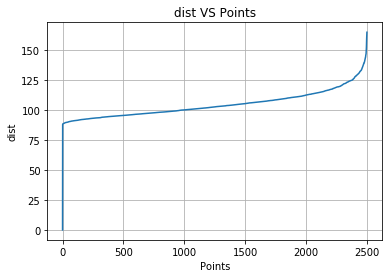

In [110]:
min_points = 1000
from sklearn.preprocessing import StandardScaler
from sklearn.metrics.pairwise import euclidean_distances
dbScanData=StandardScaler().fit_transform(T_TFIDF_train_tr_new.toarray())

distance=[]
for point in tqdm(dbScanData):
    temp = euclidean_distances(dbScanData, point.reshape(1, -1))
    distance.append(temp[min_points])
sorted_distance = np.sort(np.array(distance))

sorted_dist = np.sort(sorted_distance.reshape(1,-1)[0])
points = [i for i in range(len(dbScanData))]


# Draw distances(d_i) VS points(x_i) plot
plt.plot(points, sorted_dist)
plt.xlabel('Points')
plt.ylabel('dist')
plt.title('dist VS Points')
plt.grid()
plt.show()

In [111]:
#we can see that point of inflexion is at eps=90
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=90,n_jobs=-1)
dbscan.fit(dbScanData)
print('No of clusters: ',len(set(dbscan.labels_)))
print('Cluster are including noise i.e -1: ',set(dbscan.labels_))

No of clusters:  2
Cluster are including noise i.e -1:  {0, -1}


In [112]:
#ignoring -1 as it is for noise
cluster1=[]
noisecluster1=[]
for i in range(dbscan.labels_.shape[0]):
    if dbscan.labels_[i] == 0:
        cluster1.append(essays[i])
    elif dbscan.labels_[i] == -1:
        noisecluster1.append(essays[i])

<h3>Summarizing each cluster by manually observing few points from each cluster.</h3>

In [113]:
for i in range(3):
    print('%s\n'%(cluster1[i]))

My students are English learners that are working on English as their second or third languages. We are a melting pot of refugees, immigrants, and native-born Americans bringing the gift of language to our school. \r\n\r\n We have over 24 languages represented in our English Learner program with students at every level of mastery.  We also have over 40 countries represented with the families within our school.  Each student brings a wealth of knowledge and experiences to us that open our eyes to new cultures, beliefs, and respect.\"The limits of your language are the limits of your world.\"-Ludwig Wittgenstein  Our English learner's have a strong support system at home that begs for more resources.  Many times our parents are learning to read and speak English along side of their children.  Sometimes this creates barriers for parents to be able to help their child learn phonetics, letter recognition, and other reading skills.\r\n\r\nBy providing these dvd's and players, students are ab

In [114]:
for i in range(3):
    print('%s\n'%(noisecluster1[i]))

All of our students receive free breakfast, lunch, before/after school care, and most of them struggle through life, but they are great kids! These young minds are eager to learn and just waiting for opportunities to succeed. They are wonderful to be around and really enjoy spending time with their friends, teachers, community members, and coaches whenever they have the opportunity. They have already experienced more obstacles than most adults will ever encounter.\r\nFewer than 25% of my students are meeting grade-level standards, but they absolutely love forming rapports, learning with high-interest resources they can manipulate, sharing their special talents (singing, dancing, cooking, etc.), and just being a normal kid. \r\nWhen we get to see them \"come to life\" while sharing their special talents during non-instructional time, it reinforces that those flashes of success and confidence will eventually transfer into in the classroom academically. Please give my students that chance

<h3>Wordcloud foor clusters</h3>

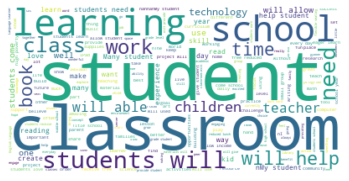

In [115]:
#cluster 1
words=''
for i in cluster1:
    words+=str(i)
from wordcloud import WordCloud
wordcloud = WordCloud(background_color="white").generate(words)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

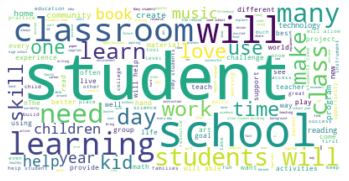

In [116]:
#noise cluster 1
words=''
for i in noisecluster1:
    words+=str(i)
from wordcloud import WordCloud
wordcloud = WordCloud(background_color="white").generate(words)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

<h1>Conclusions</h1>

In [1]:
#prettytable for kmeans
from prettytable import PrettyTable    
x = PrettyTable()
x.field_names = ["Model","BEST K","Eps","Number of clusters(INCLUDING NOISE)"]

x.add_row(['KMEANS','6','NA','NA'])
x.add_row(['AGGLOMERATIVE','2','NA','NA'])
x.add_row(['AGGLOMERATIVE','5','NA','NA'])
x.add_row(['DBSCAN','2',90,2])
                 
print(x)

+---------------+--------+-----+-------------------------------------+
|     Model     | BEST K | Eps | Number of clusters(INCLUDING NOISE) |
+---------------+--------+-----+-------------------------------------+
|     KMEANS    |   6    |  NA |                  NA                 |
| AGGLOMERATIVE |   2    |  NA |                  NA                 |
| AGGLOMERATIVE |   5    |  NA |                  NA                 |
|     DBSCAN    |   2    |  90 |                  2                  |
+---------------+--------+-----+-------------------------------------+
